In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras import Sequential #helps us to initialise the ann
from tensorflow.keras.layers  import Dense #helps us to add the number hidden to the ann
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("Project_DL_Heart_failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

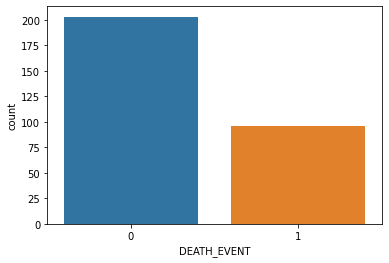

In [6]:
sns.countplot(data=df,x="DEATH_EVENT")

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

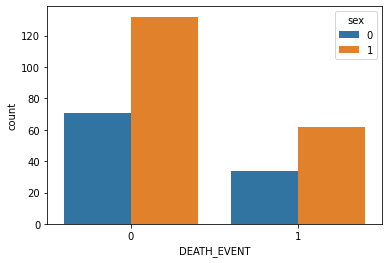

In [7]:
sns.countplot(data=df,x="DEATH_EVENT",hue="sex")

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

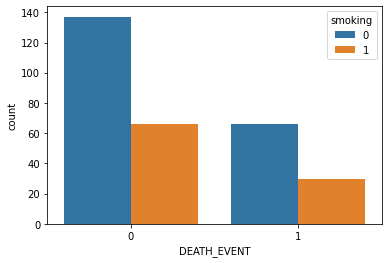

In [8]:
sns.countplot(data=df,x="DEATH_EVENT",hue="smoking")

<AxesSubplot:>

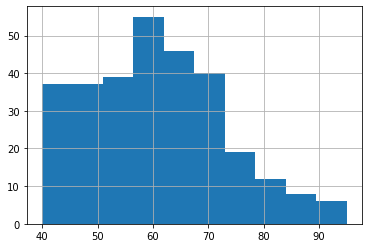

In [9]:
df['age'].hist()

<AxesSubplot:>

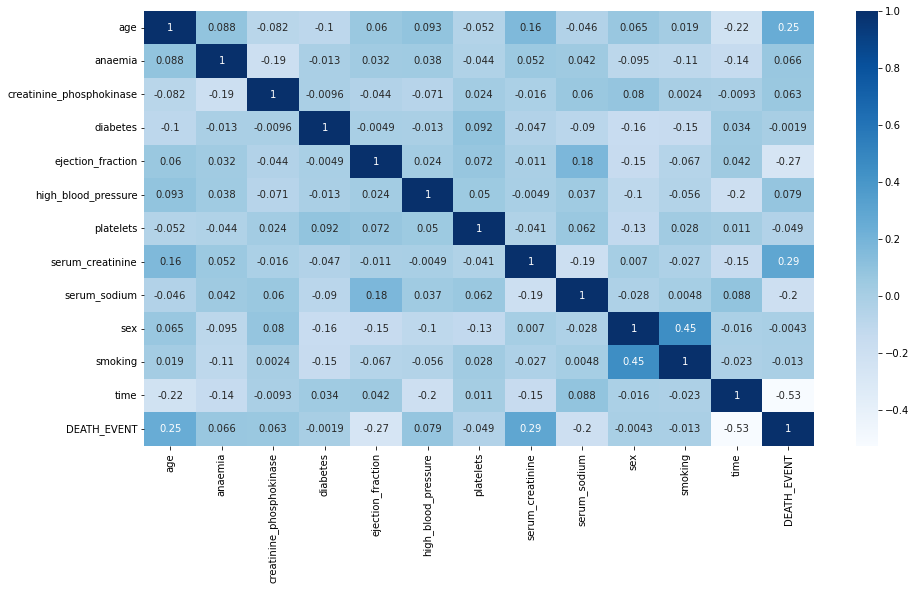

In [10]:
pyplot.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="Blues")


In [11]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
x

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [15]:
x

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [17]:
#step1 -: initialise the ann model
ann = Sequential()

#step2 -: add the layers
ann.add(Dense(units=30, activation="relu")) #hidden layers -: relu = rectified linear unit
ann.add(Dense(units=15, activation="relu"))
ann.add(Dense(units=1, activation="sigmoid"))

#step3 -: establish the connection btwn the layers
ann.compile(optimizer="adam", loss="binary_crossentropy")

#step4 -: train the model
ann.fit(xtrain, ytrain, epochs=450,validation_data=(xtest,ytest))




Epoch 1/450
8/8 [==============================] - 1s 24ms/step - loss: 0.6594 - val_loss: 0.6363
Epoch 2/450
8/8 [==============================] - 0s 5ms/step - loss: 0.6292 - val_loss: 0.6053
Epoch 3/450
8/8 [==============================] - 0s 5ms/step - loss: 0.6063 - val_loss: 0.5755
Epoch 4/450
8/8 [==============================] - 0s 6ms/step - loss: 0.5823 - val_loss: 0.5541
Epoch 5/450
8/8 [==============================] - 0s 4ms/step - loss: 0.5635 - val_loss: 0.5336
Epoch 6/450
8/8 [==============================] - 0s 8ms/step - loss: 0.5455 - val_loss: 0.5179
Epoch 7/450
8/8 [==============================] - 0s 6ms/step - loss: 0.5288 - val_loss: 0.5022
Epoch 8/450
8/8 [==============================] - 0s 7ms/step - loss: 0.5138 - val_loss: 0.4873
Epoch 9/450
8/8 [==============================] - 0s 4ms/step - loss: 0.4991 - val_loss: 0.4759
Epoch 10/450
8/8 [==============================] - 0s 5ms/step - loss: 0.4854 - val_loss: 0.4647
Epoch 11/450
8/8 [==========

8/8 [==============================] - 0s 5ms/step - loss: 0.2035 - val_loss: 0.3966
Epoch 85/450
8/8 [==============================] - 0s 3ms/step - loss: 0.2019 - val_loss: 0.3977
Epoch 86/450
8/8 [==============================] - 0s 3ms/step - loss: 0.1996 - val_loss: 0.3949
Epoch 87/450
8/8 [==============================] - 0s 4ms/step - loss: 0.1987 - val_loss: 0.3967
Epoch 88/450
8/8 [==============================] - 0s 5ms/step - loss: 0.1964 - val_loss: 0.3991
Epoch 89/450
8/8 [==============================] - 0s 4ms/step - loss: 0.1951 - val_loss: 0.3975
Epoch 90/450
8/8 [==============================] - 0s 4ms/step - loss: 0.1923 - val_loss: 0.3969
Epoch 91/450
8/8 [==============================] - 0s 5ms/step - loss: 0.1906 - val_loss: 0.3977
Epoch 92/450
8/8 [==============================] - 0s 4ms/step - loss: 0.1879 - val_loss: 0.3974
Epoch 93/450
8/8 [==============================] - 0s 4ms/step - loss: 0.1858 - val_loss: 0.3986
Epoch 94/450
8/8 [===============

8/8 [==============================] - 0s 4ms/step - loss: 0.0672 - val_loss: 0.5208
Epoch 168/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0664 - val_loss: 0.5276
Epoch 169/450
8/8 [==============================] - 0s 5ms/step - loss: 0.0655 - val_loss: 0.5264
Epoch 170/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0639 - val_loss: 0.5234
Epoch 171/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0635 - val_loss: 0.5237
Epoch 172/450
8/8 [==============================] - 0s 5ms/step - loss: 0.0623 - val_loss: 0.5276
Epoch 173/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0614 - val_loss: 0.5299
Epoch 174/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0605 - val_loss: 0.5342
Epoch 175/450
8/8 [==============================] - 0s 3ms/step - loss: 0.0601 - val_loss: 0.5375
Epoch 176/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0590 - val_loss: 0.5388
Epoch 177/450
8/8 [=====

Epoch 250/450
8/8 [==============================] - 0s 3ms/step - loss: 0.0227 - val_loss: 0.7192
Epoch 251/450
8/8 [==============================] - 0s 5ms/step - loss: 0.0225 - val_loss: 0.7241
Epoch 252/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0222 - val_loss: 0.7241
Epoch 253/450
8/8 [==============================] - 0s 2ms/step - loss: 0.0218 - val_loss: 0.7337
Epoch 254/450
8/8 [==============================] - 0s 6ms/step - loss: 0.0216 - val_loss: 0.7365
Epoch 255/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0214 - val_loss: 0.7397
Epoch 256/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0211 - val_loss: 0.7425
Epoch 257/450
8/8 [==============================] - 0s 5ms/step - loss: 0.0208 - val_loss: 0.7474
Epoch 258/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0205 - val_loss: 0.7502
Epoch 259/450
8/8 [==============================] - 0s 6ms/step - loss: 0.0205 - val_loss: 0.7472
Epoch 260/

8/8 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.9296
Epoch 333/450
8/8 [==============================] - 0s 6ms/step - loss: 0.0090 - val_loss: 0.9354
Epoch 334/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0088 - val_loss: 0.9399
Epoch 335/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.9384
Epoch 336/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0088 - val_loss: 0.9442
Epoch 337/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.9472
Epoch 338/450
8/8 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 0.9432
Epoch 339/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.9460
Epoch 340/450
8/8 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.9488
Epoch 341/450
8/8 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.9516
Epoch 342/450
8/8 [=====

Epoch 415/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 1.0995
Epoch 416/450
8/8 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 1.1064
Epoch 417/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 1.1057
Epoch 418/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 1.1057
Epoch 419/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 1.1103
Epoch 420/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 1.1088
Epoch 421/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 1.1103
Epoch 422/450
8/8 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 1.1068
Epoch 423/450
8/8 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 1.1124
Epoch 424/450
8/8 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 1.1163
Epoch 425/

<AxesSubplot:>

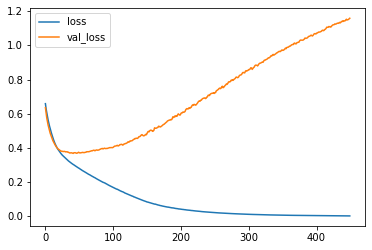

In [18]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()

In [19]:
ypred=ann.predict(xtest)
ypred=ypred>0.5
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

2/2 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.67      0.71      0.69        14

    accuracy                           0.85        60
   macro avg       0.79      0.80      0.80        60
weighted avg       0.85      0.85      0.85        60



In [20]:
#step1 -: initialise the ann model
ann = Sequential()

#step2 -: add the layers
ann.add(Dense(units=30, activation="relu")) #hidden layers -: relu = rectified linear unit
ann.add(Dense(units=15, activation="relu"))
ann.add(Dense(units=1, activation="sigmoid"))

#step3 -: establish the connection btwn the layers
ann.compile(optimizer="adam", loss="binary_crossentropy")

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
earlystop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [23]:
ann.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/600
8/8 [==============================] - 1s 41ms/step - loss: 0.7105 - val_loss: 0.6880
Epoch 2/600
8/8 [==============================] - 0s 2ms/step - loss: 0.6711 - val_loss: 0.6463
Epoch 3/600
8/8 [==============================] - 0s 3ms/step - loss: 0.6401 - val_loss: 0.6119
Epoch 4/600
8/8 [==============================] - 0s 5ms/step - loss: 0.6143 - val_loss: 0.5836
Epoch 5/600
8/8 [==============================] - 0s 6ms/step - loss: 0.5904 - val_loss: 0.5606
Epoch 6/600
8/8 [==============================] - 0s 4ms/step - loss: 0.5692 - val_loss: 0.5377
Epoch 7/600
8/8 [==============================] - 0s 6ms/step - loss: 0.5483 - val_loss: 0.5176
Epoch 8/600
8/8 [==============================] - 0s 4ms/step - loss: 0.5279 - val_loss: 0.5016
Epoch 9/600
8/8 [==============================] - 0s 6ms/step - loss: 0.5081 - val_loss: 0.4846
Epoch 10/600
8/8 [==============================] - 0s 3ms/step - loss: 0.4893 - val_loss: 0.4668
Epoch 11/600
8/8 [==========

<AxesSubplot:>

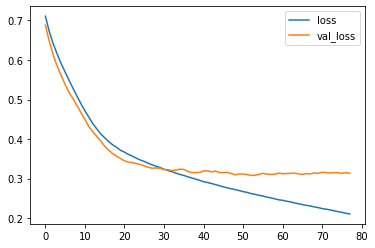

In [24]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()

In [25]:
ypred=ann.predict(xtest)
ypred=ypred>0.5
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        46
           1       0.69      0.79      0.73        14

    accuracy                           0.87        60
   macro avg       0.81      0.84      0.82        60
weighted avg       0.87      0.87      0.87        60

